Repo: https://github.com/nytimes/covid-19-data
<li> Calculate the total number of confirmed cases & deaths broken down by county for Connecticut
<li> Given the data that you calculate, present that visually any way. Note this homework is not going to be judging on UX design

In [73]:
"""
!pip install pandas 
!pip install plotly==3.10.0
"""

'\n!pip install pandas \n!pip install plotly==3.10.0\n'

In [74]:
# load libraries
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [75]:
import matplotlib.pyplot as plt

In [76]:
# load data
df = pd.read_csv('data/us-counties.csv')

In [77]:
df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [78]:
connecticut_df = df[df.state == 'Connecticut']

In [79]:
print(f' Total number of records for state Connceticut: {connecticut_df.shape[0]}')

 Total number of records for state Connceticut: 251


In [80]:
# reset index
connecticut_df.reset_index(inplace=True)

In [81]:
# drop state we don't need it
connecticut_df.drop(columns=['state', 'index'], inplace=True)

In [82]:
# check data types
connecticut_df.dtypes

date       object
county     object
fips      float64
cases       int64
deaths      int64
dtype: object

### Total Number of Confirmed Cases & Deaths by County 

In [83]:
aggregated_df = connecticut_df[['county', 'cases', 'deaths']].groupby(['county']).max()

In [84]:
aggregated_df.reset_index(inplace=True)

In [85]:
aggregated_df.head()

,county,cases,deaths
0,Fairfield,6004,262
1,Hartford,2243,133
2,Litchfield,446,24
3,Middlesex,339,19
4,New Haven,3358,135


## Visualize the Above Data

<Figure size 432x288 with 0 Axes>

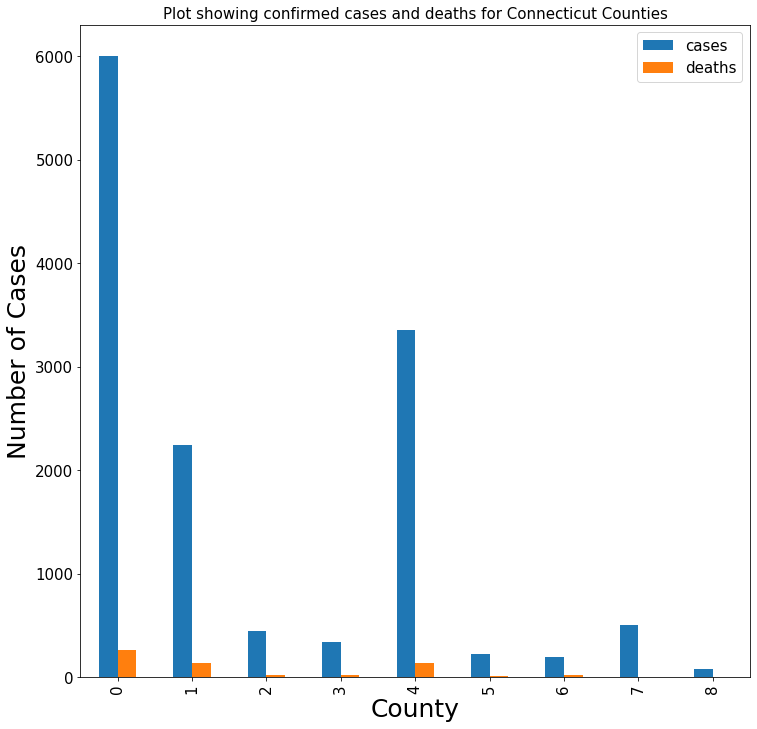

In [86]:
fig = plt.figure()
aggregated_df.plot.bar(figsize=(12,12))
plt.xlabel("County", fontsize=25)
plt.ylabel("Number of Cases", fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Plot showing confirmed cases and deaths for Connecticut Counties", fontsize=15)
plt.legend(fontsize=15)
plt.show()

## Interactive Plotly Plots 

In [87]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot
init_notebook_mode(connected=True)

layout_bar = go.Layout(dict(
    title='Plot Showing Total Cases & Deaths in Connecticut Counties',
    xaxis=dict(
        title= "County",
    ),

    yaxis1=dict(
        title='Count',
    ),
))


figp = go.Figure(data=[
    go.Bar(name='Cases', x=aggregated_df.index, y=aggregated_df.cases),
    go.Bar(name='Deaths', x=aggregated_df.index, y=aggregated_df.deaths)
],
                layout=layout_bar)

In [88]:
plot(figp, filename='plot_cases_deaths.html')

'plot_cases_deaths.html'